In [57]:
!pip install google-colab

     |████████████████████████████████| 72 kB 2.3 MB/s eta 0:00:011
     |████████████████████████████████| 64 kB 20.0 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 30.6 MB/s eta 0:00:01
     |████████████████████████████████| 758 kB 120.3 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 57.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.8 MB 43.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 18.7 MB/s eta 0:00:01
     |████████████████████████████████| 484 kB 31.3 MB/s eta 0:00:01
     |████████████████████████████████| 245 kB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 39.3 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 19.2 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 14.4 MB/s eta 0:00:01


  Created wheel for google-colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102291 sha256=900212bed4e47f5943173d19a00b431816c4b7ebe6395225abf8cb6e444d64ef
  Stored in directory: /Users/zachbloss/Library/Caches/pip/wheels/a8/c1/f9/565bc1832dda03cc21db8c8751487357f616112b6113bbf9bb
  ERROR: Command errored out with exit status 1:
   command: /Users/zachbloss/miniforge_x86_64/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/wk/7_jgt9ms2vv7jzkq_hkgjv1h0000gn/T/pip-install-d1ac8grh/pandas_3648c9d03a5e4f75adcdf55b17613605/setup.py'"'"'; __file__='"'"'/private/var/folders/wk/7_jgt9ms2vv7jzkq_hkgjv1h0000gn/T/pip-install-d1ac8grh/pandas_3648c9d03a5e4f75adcdf55b17613605/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'

  Created wheel for portpicker: filename=portpicker-1.2.0-py3-none-any.whl size=13385 sha256=71cbae7faeb1d030ce87f55c5b45387912ea12055728443ec3958223c81e9be6
  Stored in directory: /Users/zachbloss/Library/Caches/pip/wheels/79/f4/2b/306dbe0f6b429a1ccb56aef907984a2f21bd6cb7f702b65d05
  Created wheel for simplegeneric: filename=simplegeneric-0.8.1-py3-none-any.whl size=5077 sha256=7db4301c436abd67ab0608ef954266f2c835c394e1ad7b409cbdcfa18e4f58bb
  Stored in directory: /Users/zachbloss/Library/Caches/pip/wheels/a7/bd/0d/d95b629ee4a7368830202858e45ac76cd837a42cafa50da81e
  Created wheel for tornado: filename=tornado-4.5.3-cp39-cp39-macosx_10_9_x86_64.whl size=422149 sha256=23021503a386d3ead4cb297380a9430a88d171db1a8baf35e1a8bf5ab4ae80dd
  Stored in directory: /Users/zachbloss/Library/Caches/pip/wheels/83/38/94/6e1e08dd9ed83e2fc92914d24bf950c39e622dfbb12bf753d8
Successfully built google-colab portpicker simplegeneric tornado
Failed to build pandas
  Attempting uninstall: six
    Found existi

In [3]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image
from tqdm.notebook import tqdm

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [4]:
# Root directory for dataset
dataroot = "../data/raw/"
processed_data_dir = '../data/processed/img_align_celeba'

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 1

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

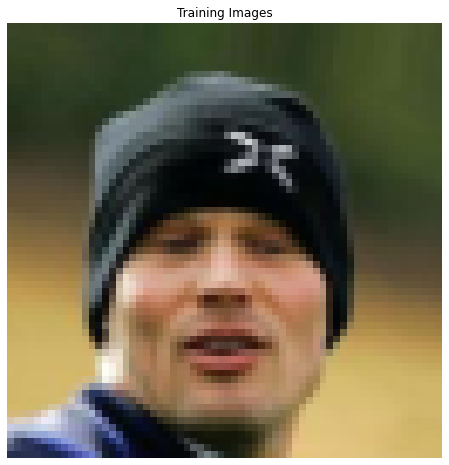

In [5]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
raw_dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(
    raw_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=workers
)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(18,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [6]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [7]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [8]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [9]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [10]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [11]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [13]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):
        
        if i > 1000:
            pass
        else:

            ############################
            # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
            ###########################
            ## Train with all-real batch
            netD.zero_grad()
            # Format batch
            real_cpu = data[0].to(device)
            b_size = real_cpu.size(0)
            label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
            # Forward pass real batch through D
            output = netD(real_cpu).view(-1)
            # Calculate loss on all-real batch
            errD_real = criterion(output, label)
            # Calculate gradients for D in backward pass
            errD_real.backward()
            D_x = output.mean().item()

            ## Train with all-fake batch
            # Generate batch of latent vectors
            noise = torch.randn(b_size, nz, 1, 1, device=device)
            # Generate fake image batch with G
            fake = netG(noise)
            label.fill_(fake_label)
            # Classify all fake batch with D
            output = netD(fake.detach()).view(-1)
            # Calculate D's loss on the all-fake batch
            errD_fake = criterion(output, label)
            # Calculate the gradients for this batch, accumulated (summed) with previous gradients
            errD_fake.backward()
            D_G_z1 = output.mean().item()
            # Compute error of D as sum over the fake and the real batches
            errD = errD_real + errD_fake
            # Update D
            optimizerD.step()

            ############################
            # (2) Update G network: maximize log(D(G(z)))
            ###########################
            netG.zero_grad()
            label.fill_(real_label)  # fake labels are real for generator cost
            # Since we just updated D, perform another forward pass of all-fake batch through D
            output = netD(fake).view(-1)
            # Calculate G's loss based on this output
            errG = criterion(output, label)
            # Calculate gradients for G
            errG.backward()
            D_G_z2 = output.mean().item()
            # Update G
            optimizerG.step()

            # Output training stats
            if i % 50 == 0:
                print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                      % (epoch, num_epochs, i, len(dataloader),
                         errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

            # Save Losses for plotting later
            G_losses.append(errG.item())
            D_losses.append(errD.item())

            # Check how the generator is doing by saving G's output on fixed_noise
            if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
                with torch.no_grad():
                    fake = netG(fixed_noise).detach().cpu()
                img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

            iters += 1

Starting Training Loop...
[0/5][0/202599]	Loss_D: 1.7540	Loss_G: 18.1851	D(x): 0.4126	D(G(z)): 0.5805 / 0.0000
[0/5][50/202599]	Loss_D: 0.0319	Loss_G: 9.7106	D(x): 0.9992	D(G(z)): 0.0306 / 0.0001
[0/5][100/202599]	Loss_D: 0.0297	Loss_G: 5.5422	D(x): 1.0000	D(G(z)): 0.0292 / 0.0039
[0/5][150/202599]	Loss_D: 0.0002	Loss_G: 18.9059	D(x): 0.9998	D(G(z)): 0.0000 / 0.0000
[0/5][200/202599]	Loss_D: 0.0740	Loss_G: 4.9706	D(x): 0.9859	D(G(z)): 0.0581 / 0.0069
[0/5][250/202599]	Loss_D: 0.0168	Loss_G: 16.0043	D(x): 0.9834	D(G(z)): 0.0000 / 0.0000
[0/5][300/202599]	Loss_D: 0.0014	Loss_G: 15.9745	D(x): 0.9986	D(G(z)): 0.0000 / 0.0000
[0/5][350/202599]	Loss_D: 0.0008	Loss_G: 20.4134	D(x): 0.9992	D(G(z)): 0.0000 / 0.0000
[0/5][400/202599]	Loss_D: 9.2222	Loss_G: 6.2299	D(x): 1.0000	D(G(z)): 0.9999 / 0.0020
[0/5][450/202599]	Loss_D: 0.0765	Loss_G: 4.1680	D(x): 1.0000	D(G(z)): 0.0737 / 0.0155
[0/5][500/202599]	Loss_D: 0.1505	Loss_G: 3.8861	D(x): 0.9505	D(G(z)): 0.0950 / 0.0205
[0/5][550/202599]	Loss_D: 

KeyboardInterrupt: 

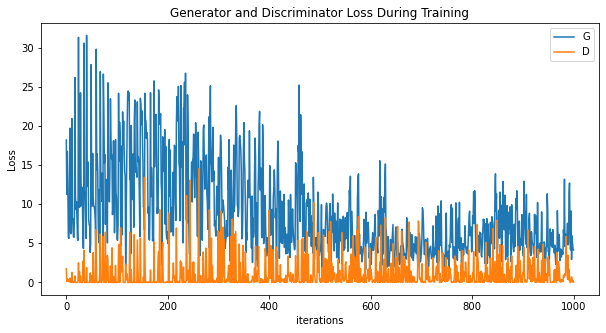

In [14]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


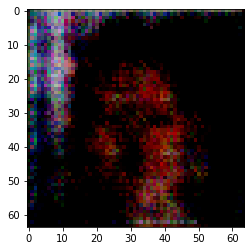

In [55]:
noise = torch.randn(1, nz, 1, 1, device=device)
# Generate fake image batch with G
fake = netG(noise)
plt.imshow(np.transpose(fake.squeeze(0).detach().numpy(), (1,2,0)))